<a href="https://colab.research.google.com/github/AbdulsemedShalo/DDOS-Detection-and-Mitigation/blob/main/DatasetGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

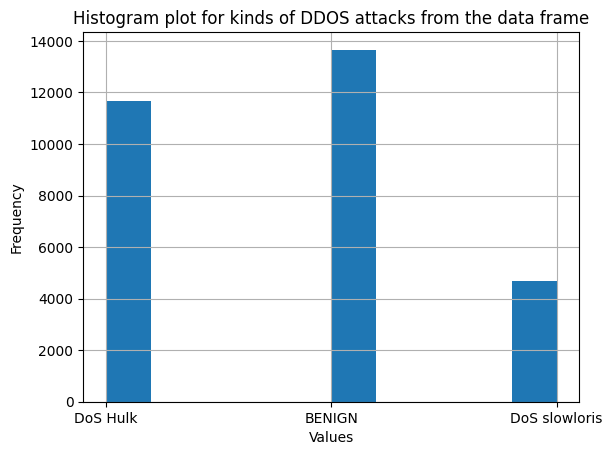

<ipython-input-19-056a9366fcde>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


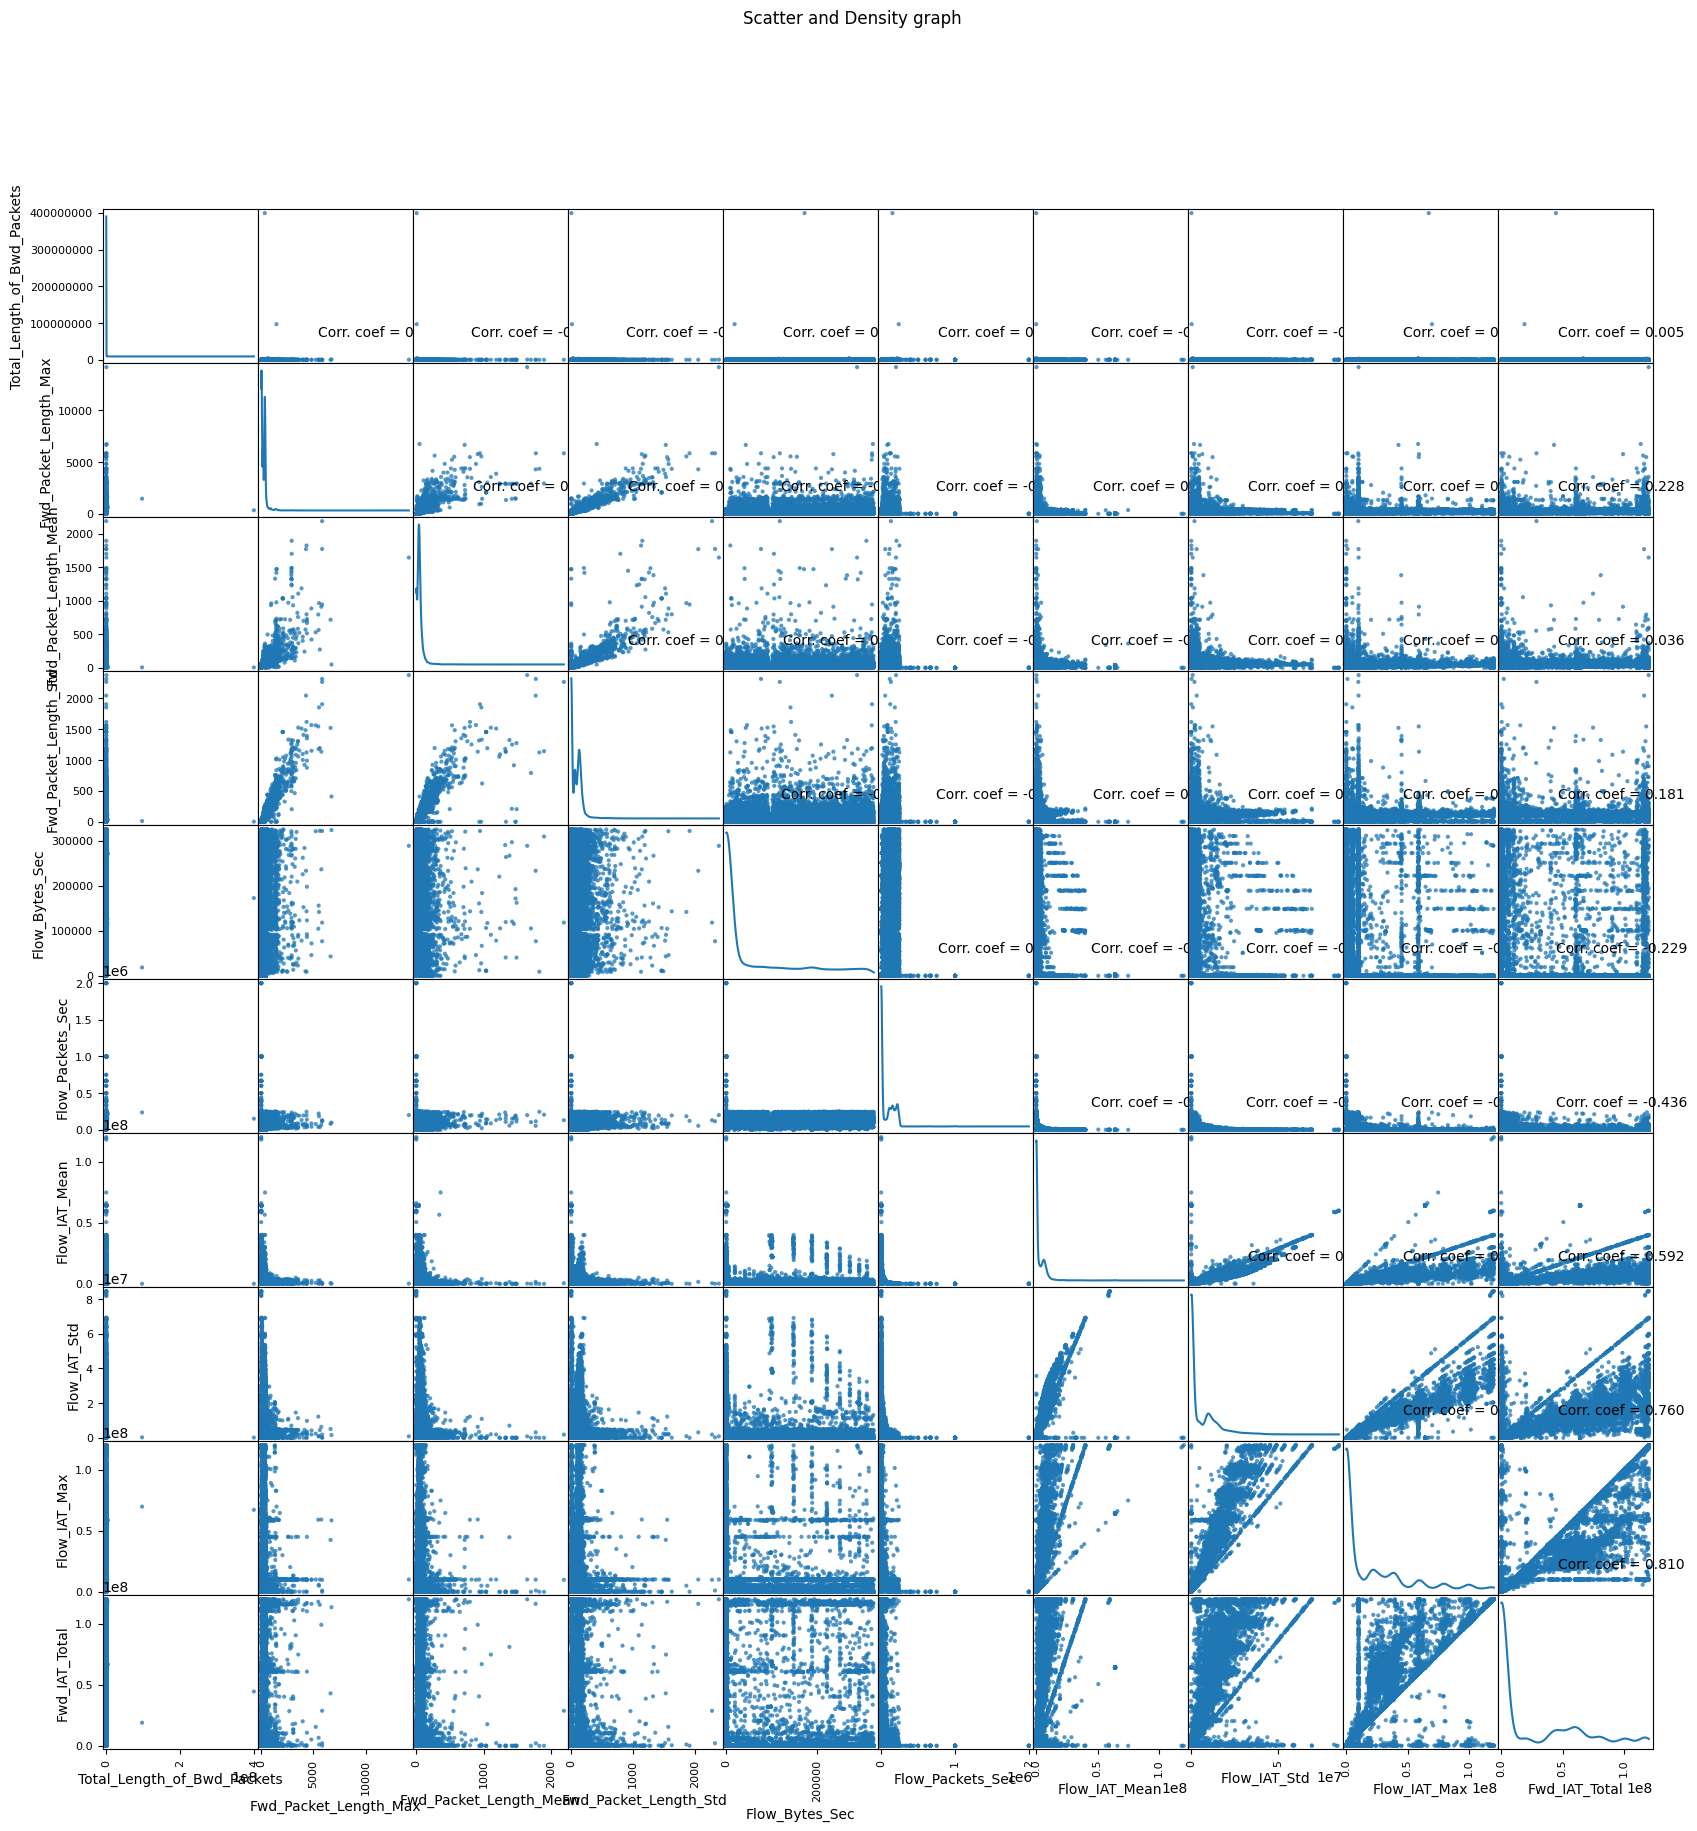

<ipython-input-19-056a9366fcde>:73: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-19-056a9366fcde>:78: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


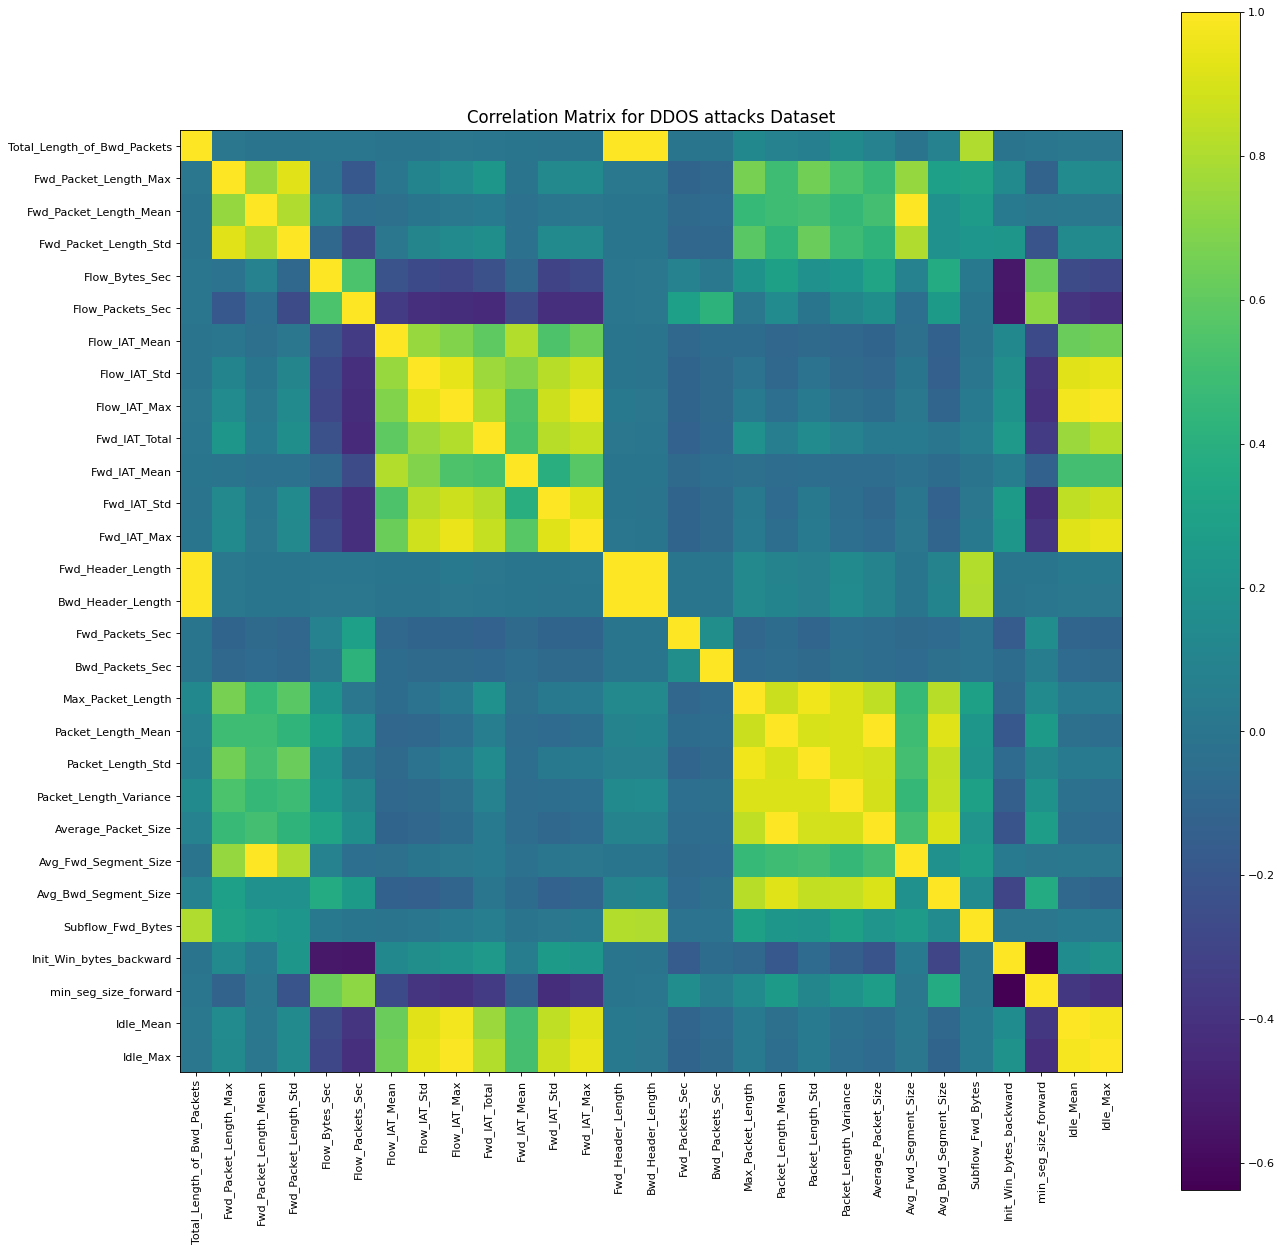

In [19]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/AbdulsemedShalo/DDOS-Detection-and-Mitigation/main/Dataset.csv')

# because ip addresses are string can't be converted to int to train, drop them.
data = data.drop("Source.IP", axis=1)
data = data.drop("Destination.IP", axis=1)


# Replace missing values with the mean of the column
data['Fwd_Packets_Sec'].fillna(data['Fwd_Packets_Sec'].median(), inplace=True)
data['Idle_Mean'].fillna(data['Idle_Mean'].median(), inplace=True)
data['Idle_Max'].fillna(data['Idle_Max'].median(), inplace=True)
data['Flow_IAT_Mean'].fillna(data['Flow_IAT_Mean'].median(), inplace=True)

data['Fwd_IAT_Mean'].fillna(data['Fwd_IAT_Mean'].median(), inplace=True)
data['Fwd_Header_Length'].fillna(data['Fwd_Header_Length'].median(), inplace=True)
data['Fwd_Packet_Length_Mean'].fillna(data['Fwd_Packet_Length_Mean'].median(), inplace=True)
data['Avg_Fwd_Segment_Size'].fillna(data['Avg_Fwd_Segment_Size'].median(), inplace=True)

data['Fwd_IAT_Std'].fillna(data['Fwd_IAT_Std'].median(), inplace=True)
data['Fwd_IAT_Total'].fillna(data['Fwd_IAT_Total'].median(), inplace=True)
data['Flow_IAT_Std'].fillna(data['Flow_IAT_Std'].median(), inplace=True)
data['Packet_Length_Mean'].fillna(data['Packet_Length_Mean'].median(), inplace=True)

data['Average_Packet_Size'].fillna(data['Average_Packet_Size'].median(), inplace=True)
data['Init_Win_bytes_backward'].fillna(data['Init_Win_bytes_backward'].median(), inplace=True)
data['min_seg_size_forward'].fillna(data['min_seg_size_forward'].median(), inplace=True)
data['Bwd_Packets_Sec'].fillna(data['Bwd_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Std'].fillna(data['Fwd_Packet_Length_Std'].median(), inplace=True)
data['Subflow_Fwd_Bytes'].fillna(data['Subflow_Fwd_Bytes'].median(), inplace=True)
data['Fwd_IAT_Max'].fillna(data['Fwd_IAT_Max'].median(), inplace=True)
data['Flow_IAT_Max'].fillna(data['Flow_IAT_Max'].median(), inplace=True)

data['Packet_Length_Variance'].fillna(data['Packet_Length_Variance'].median(), inplace=True)
data['Packet_Length_Std'].fillna(data['Packet_Length_Std'].median(), inplace=True)
data['Flow_Bytes_Sec'].fillna(data['Flow_Bytes_Sec'].median(), inplace=True)
data['Flow_Packets_Sec'].fillna(data['Flow_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Max'].fillna(data['Fwd_Packet_Length_Max'].median(), inplace=True)
data['Max_Packet_Length'].fillna(data['Max_Packet_Length'].median(), inplace=True)



def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density graph')
    plt.show()


def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for DDOS attacks Dataset', fontsize=15)
    plt.show()

data['Label'].hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram plot for kinds of DDOS attacks from the data frame')
plt.show()


plotScatterMatrix(data, 20, 10)
plotCorrelationMatrix(data,19)

